In [1]:
# 1_EDA_and_Data_Cleaning.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [98]:
# Load the dataset
data = pd.read_csv('../data/AmesHousing.csv')
data = pd.get_dummies(data, drop_first=True)

In [99]:
correlation_matrix = data.corr()
top_features = correlation_matrix['SalePrice'].sort_values(ascending=False).index[1:15]
print("Top Features Correlated with SalePrice:\n", top_features)

# Filter the dataset to keep only the top 10 features and SalePrice
data = data[['SalePrice'] + top_features.to_list()]
data = data.dropna()

Top Features Correlated with SalePrice:
 Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Foundation_PConc', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces'],
      dtype='object')


In [100]:
# Basic data exploration
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)
print("Missing Values:\n", data.isnull().sum().sort_values(ascending=False).head(20))
print("Dataset Description:\n", data.describe())



Dataset Shape: (2748, 15)
Dataset Columns: Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Foundation_PConc', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces'],
      dtype='object')
Missing Values:
 SalePrice           0
Overall Qual        0
Gr Liv Area         0
Garage Cars         0
Garage Area         0
Total Bsmt SF       0
1st Flr SF          0
Year Built          0
Full Bath           0
Year Remod/Add      0
Garage Yr Blt       0
Foundation_PConc    0
Mas Vnr Area        0
TotRms AbvGrd       0
Fireplaces          0
dtype: int64
Dataset Description:
            SalePrice  Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
count    2748.000000   2748.000000  2748.000000  2748.000000  2748.000000   
mean   184721.886099      6.170306  1513.937045     1.864993   499.196507   
std     79531.065051      1.379856   503.038835     0.65232

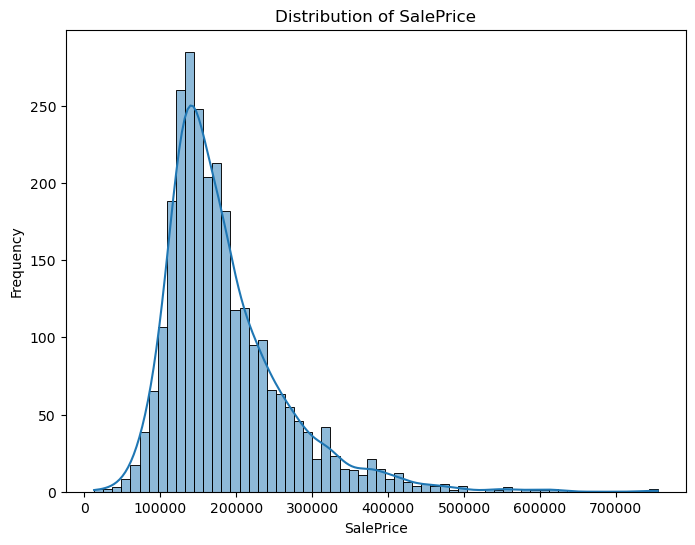

In [101]:
# Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


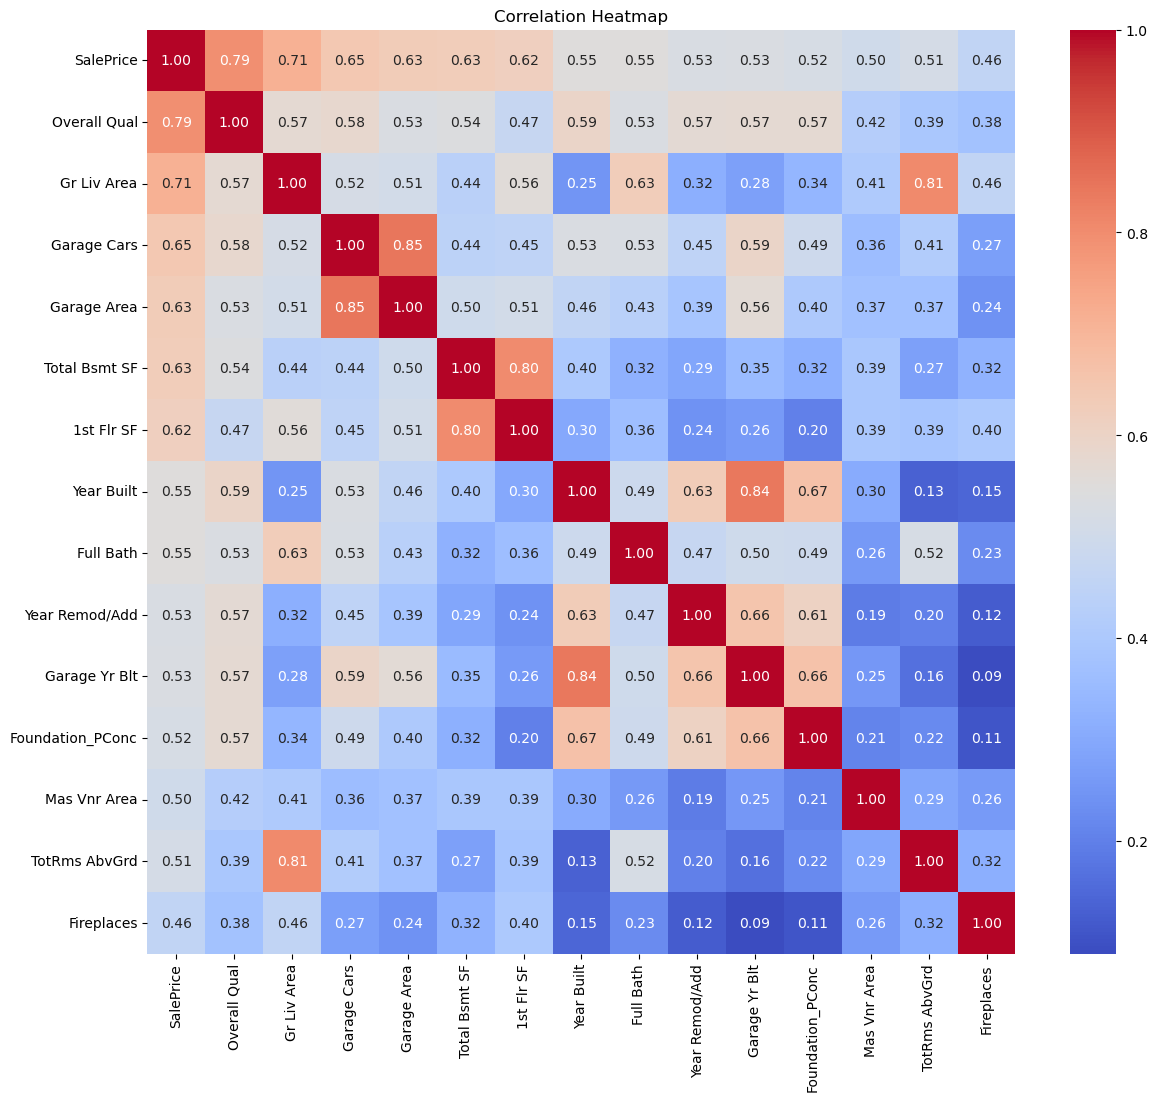

In [102]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [103]:
data = data.drop(columns=['Garage Cars'])
data = data.drop(columns=['Garage Yr Blt'])
data = data.drop(columns=['1st Flr SF'])
data = data.drop(columns=['TotRms AbvGrd'])

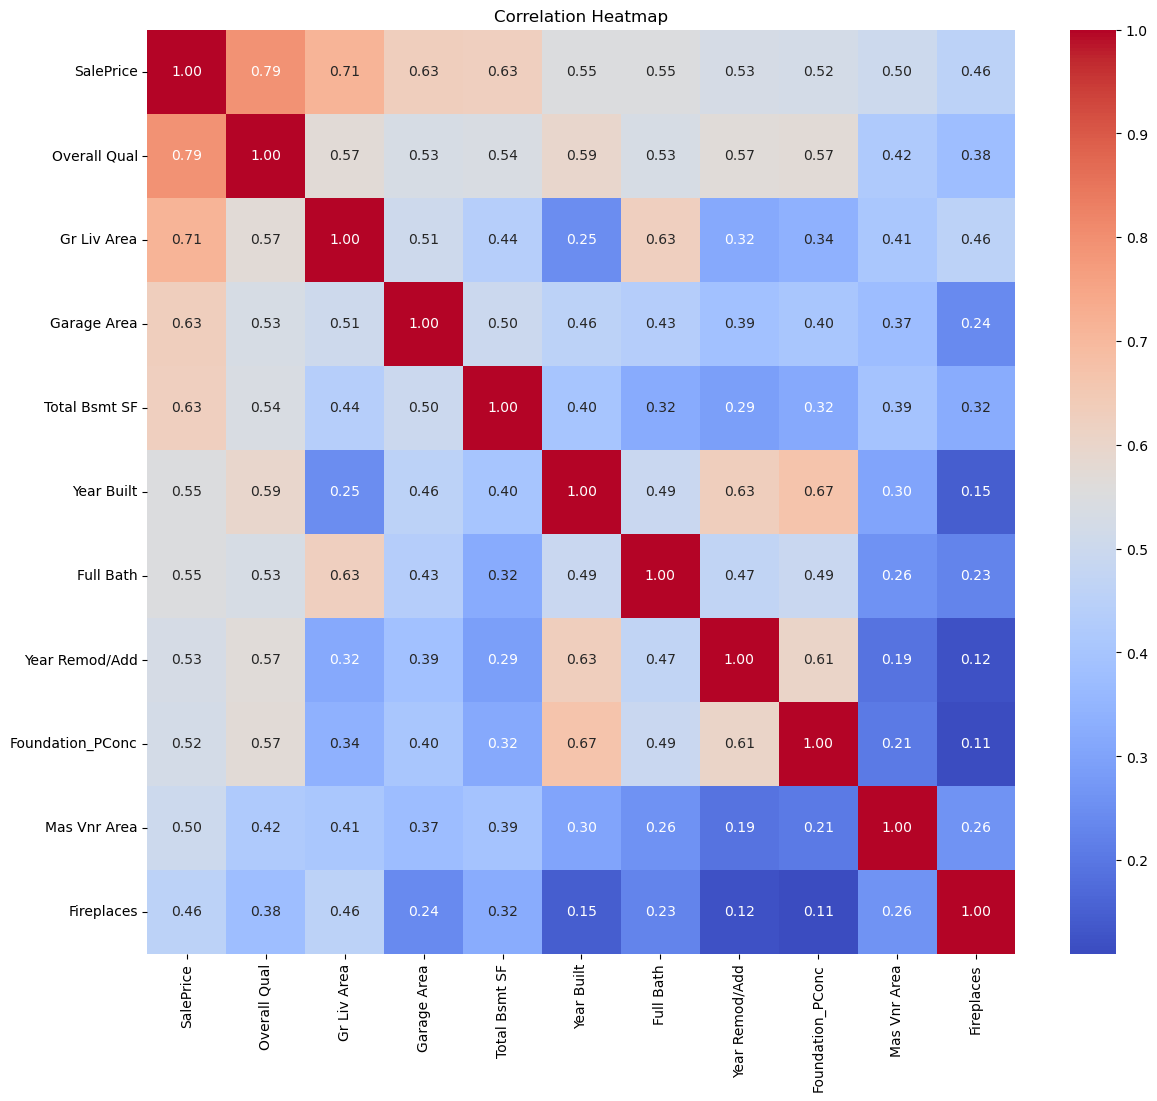

In [104]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

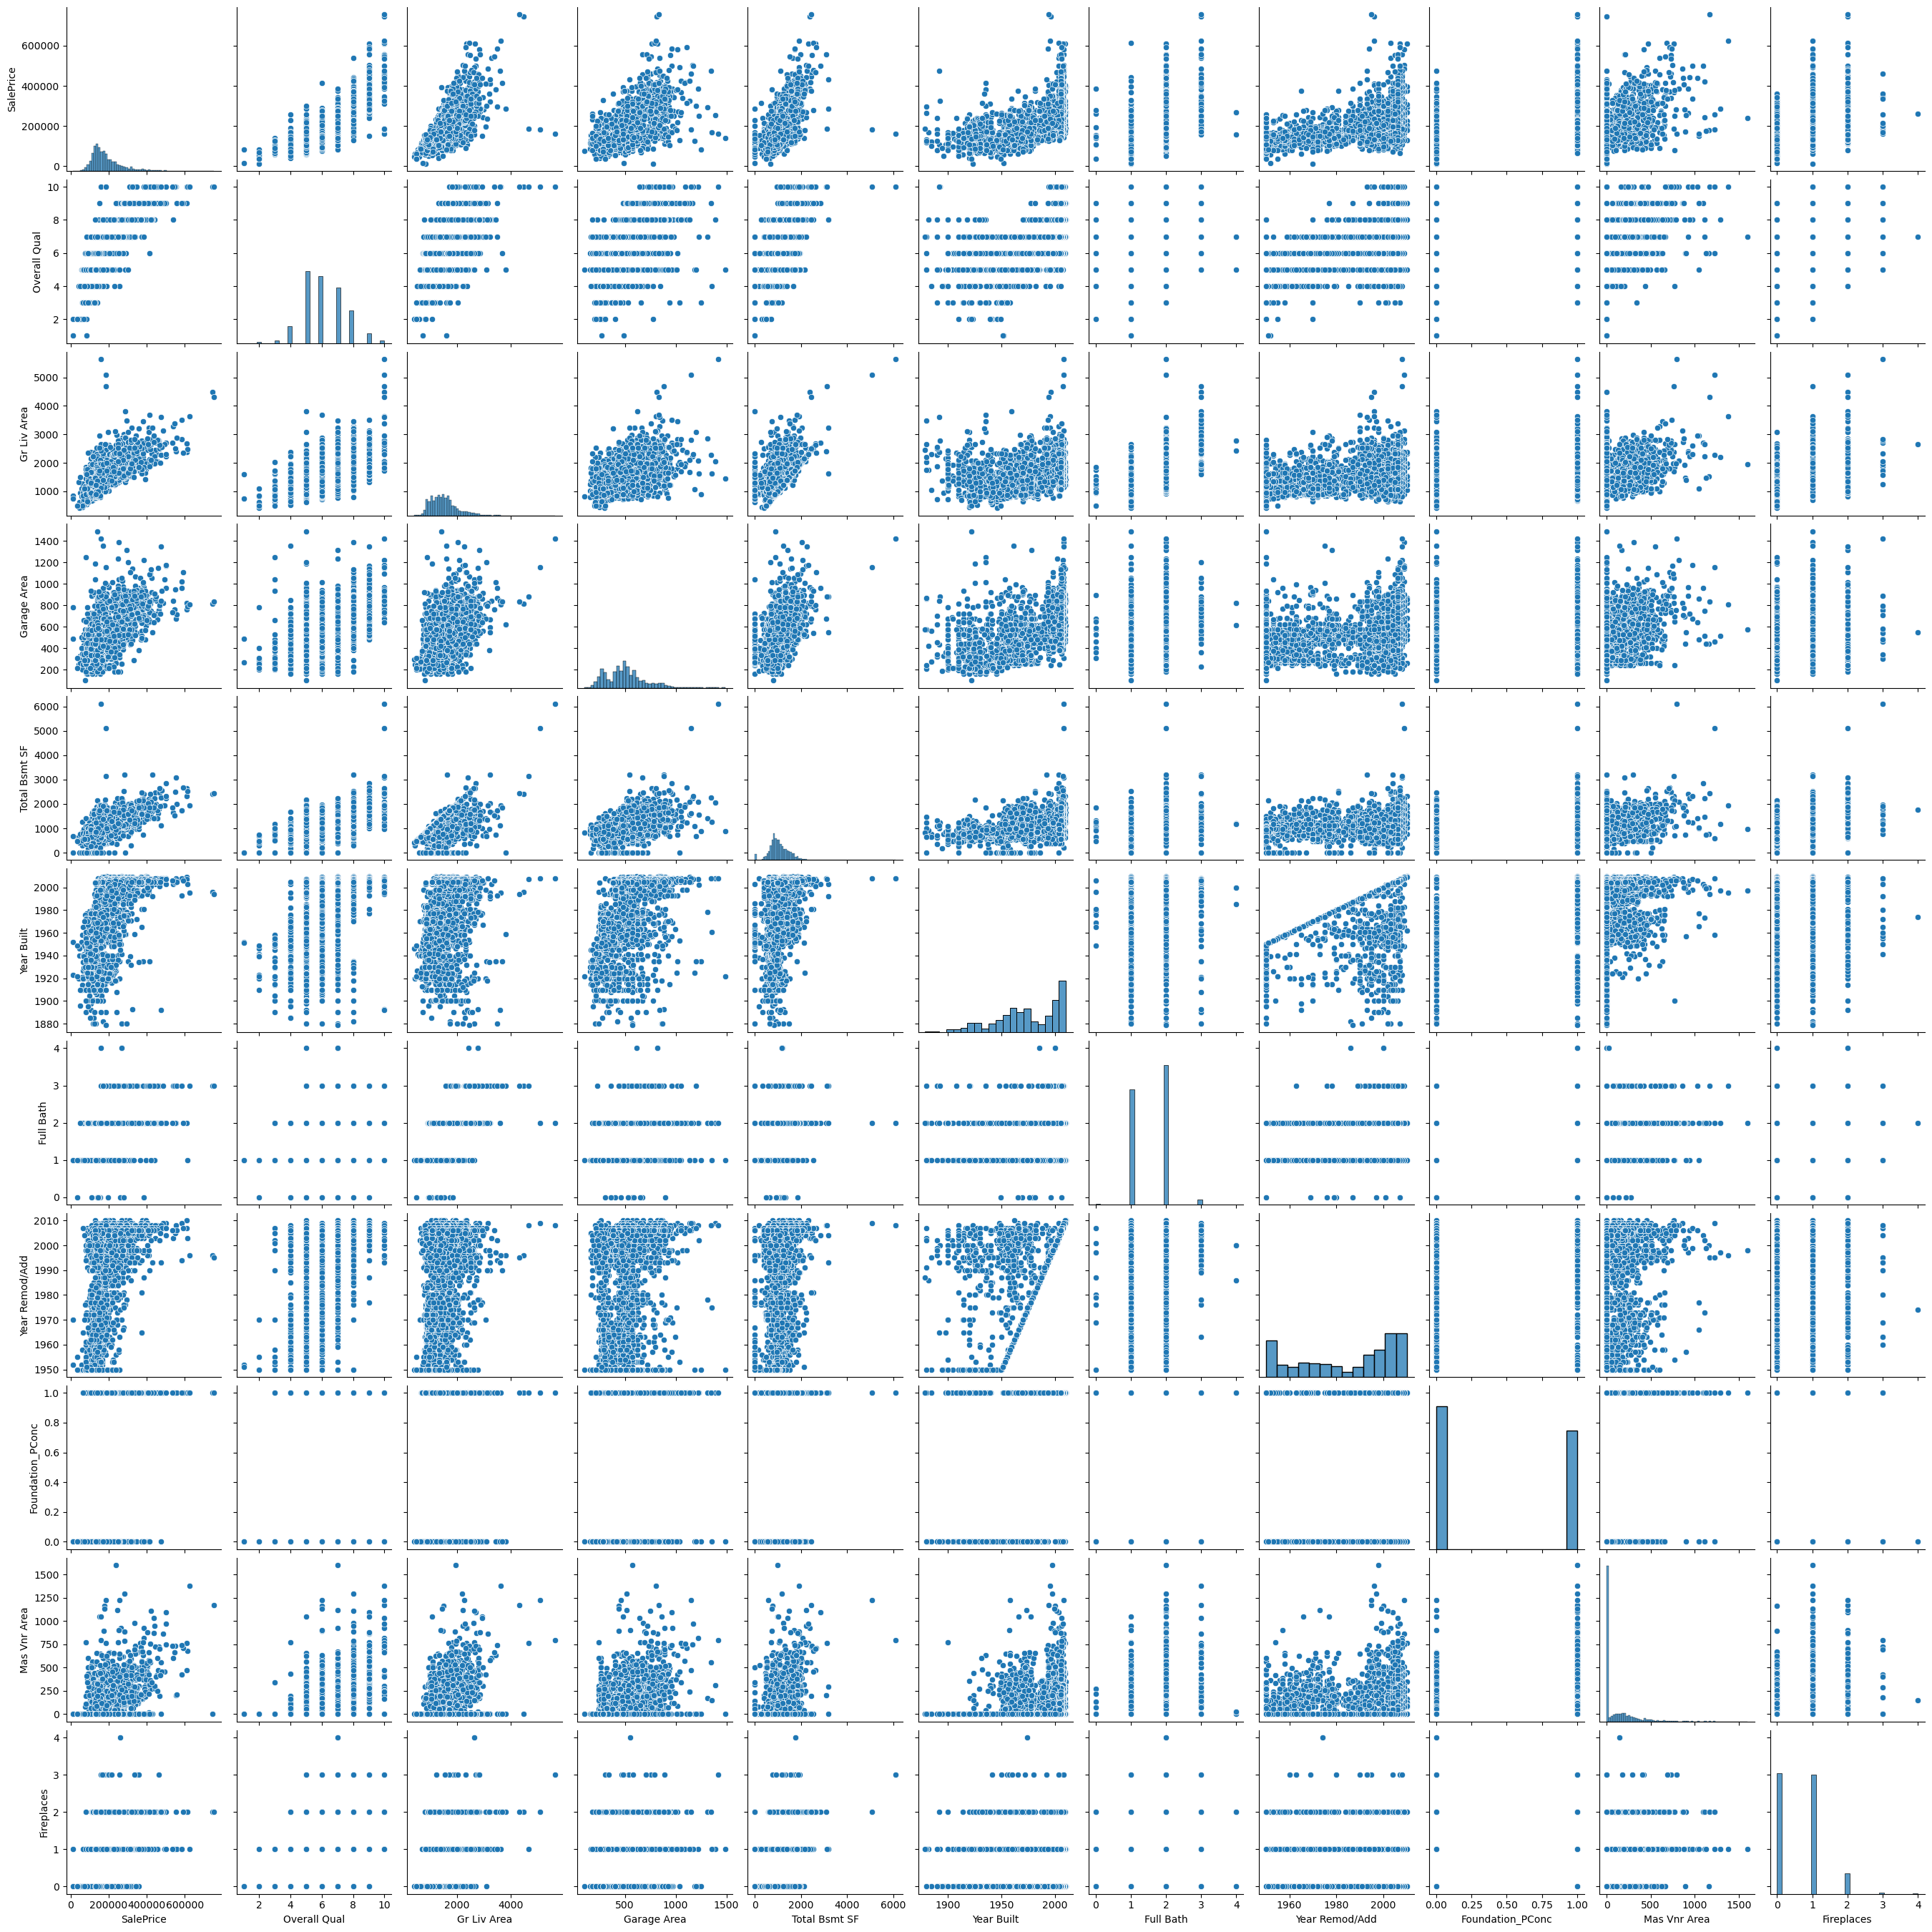

In [105]:
# Pairplot of top correlated features with SalePrice
sns.pairplot(data)
plt.show()

In [107]:
# Remove outliers
data = data[data['Gr Liv Area'] < 4000]

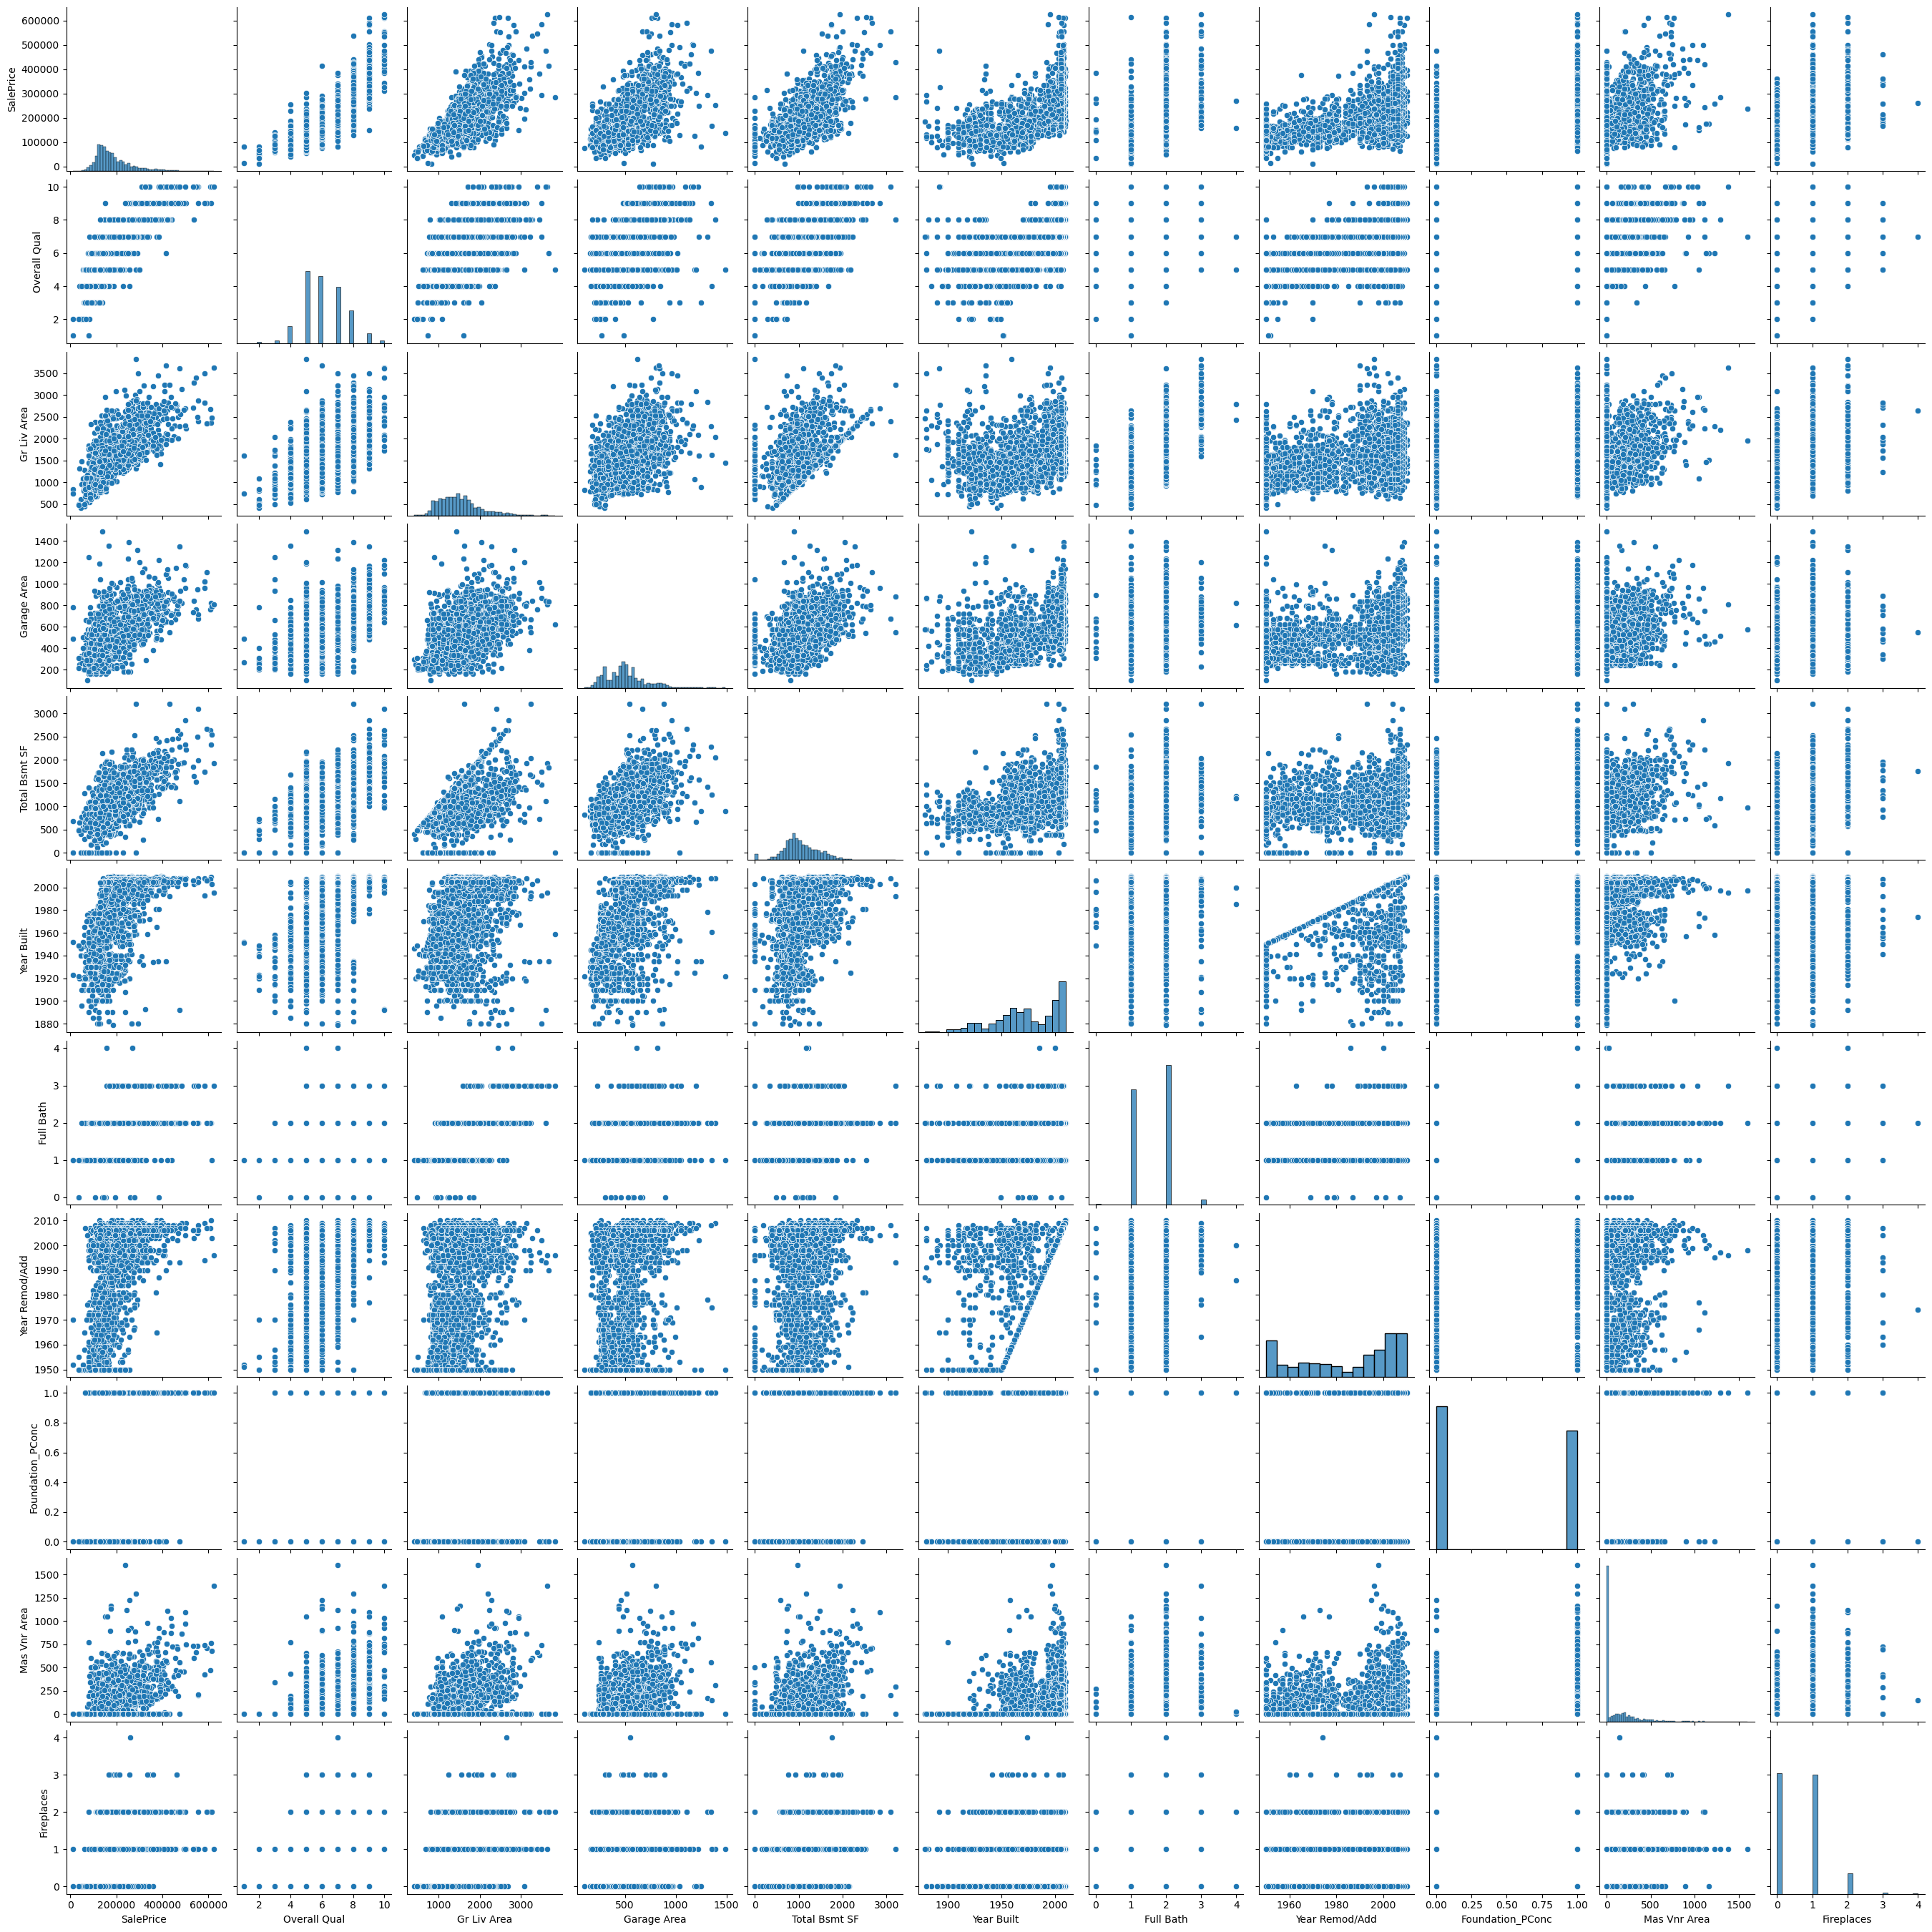

In [108]:
# Pairplot of top correlated features with SalePrice
sns.pairplot(data)
plt.show()

In [109]:
# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Save the resulting datasets to CSV files
train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)

print("Data successfully split into train and test sets.")

Data successfully split into train and test sets.
